In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from feature_engine.creation import CyclicalFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
sb.set()

In [306]:
data=pd.read_excel(r"C:\Users\Admin\Desktop\Time_Series_Practice\Weekly_Sales_UCI\online_retail_II.xlsx")
data=data.drop(columns=['Invoice', 'Customer ID', 'Description', 'StockCode', 'Country'], axis=1)
data['Net_Price']=data['Quantity']*data['Price']
data=data.drop(columns=['Price', 'Quantity'], axis=1)
data

,InvoiceDate,Net_Price
0,2009-12-01 07:45:00,83.40
1,2009-12-01 07:45:00,81.00
2,2009-12-01 07:45:00,81.00
3,2009-12-01 07:45:00,100.80
4,2009-12-01 07:45:00,30.00
...,...,...
525456,2010-12-09 20:01:00,5.90
525457,2010-12-09 20:01:00,3.75
525458,2010-12-09 20:01:00,3.75
525459,2010-12-09 20:01:00,7.50


In [307]:
data.dtypes

InvoiceDate    datetime64[ns]
Net_Price             float64
dtype: object

In [308]:
data.isna().sum()

InvoiceDate    0
Net_Price      0
dtype: int64

In [309]:
data.set_index("InvoiceDate", inplace=True)

In [310]:
data

,Net_Price
InvoiceDate,
2009-12-01 07:45:00,83.40
2009-12-01 07:45:00,81.00
2009-12-01 07:45:00,81.00
2009-12-01 07:45:00,100.80
2009-12-01 07:45:00,30.00
...,...
2010-12-09 20:01:00,5.90
2010-12-09 20:01:00,3.75
2010-12-09 20:01:00,3.75


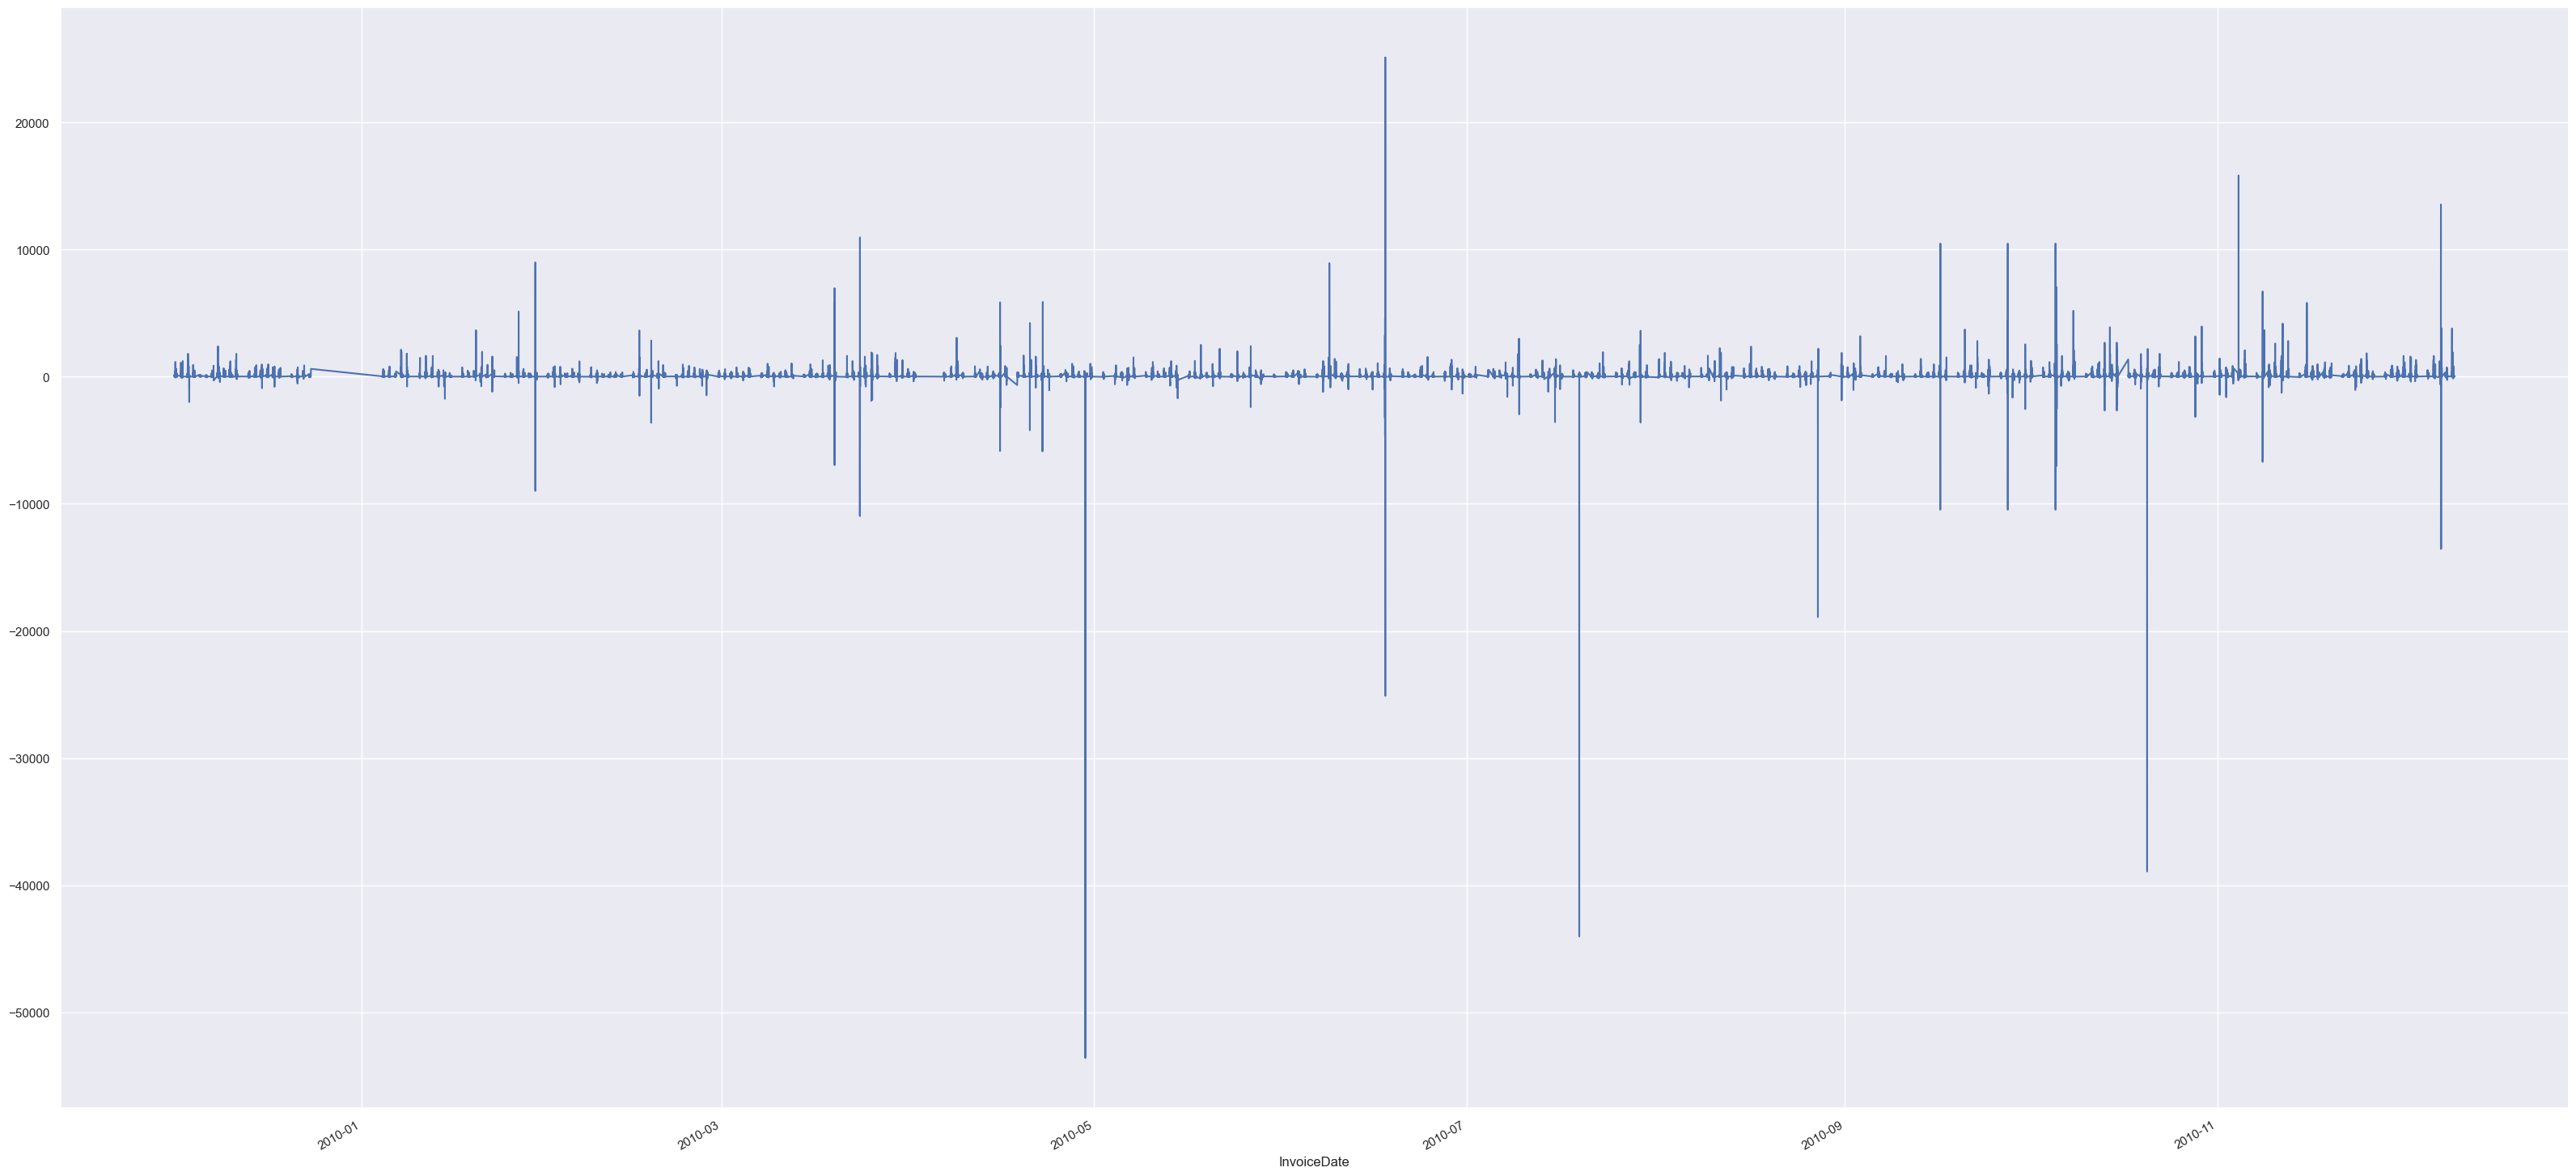

In [311]:
for var in ['Net_Price']:
    
    data[var].plot(figsize=(40,20))
    
    plt.show()

In [312]:
data = data.groupby(pd.Grouper(freq='W')).sum()
data

,Net_Price
InvoiceDate,
2009-12-06,258496.320
2009-12-13,232310.100
2009-12-20,256240.200
2009-12-27,52800.490
2010-01-03,0.000
2010-01-10,166393.590
2010-01-17,156990.910
2010-01-24,148777.541
2010-01-31,151870.851


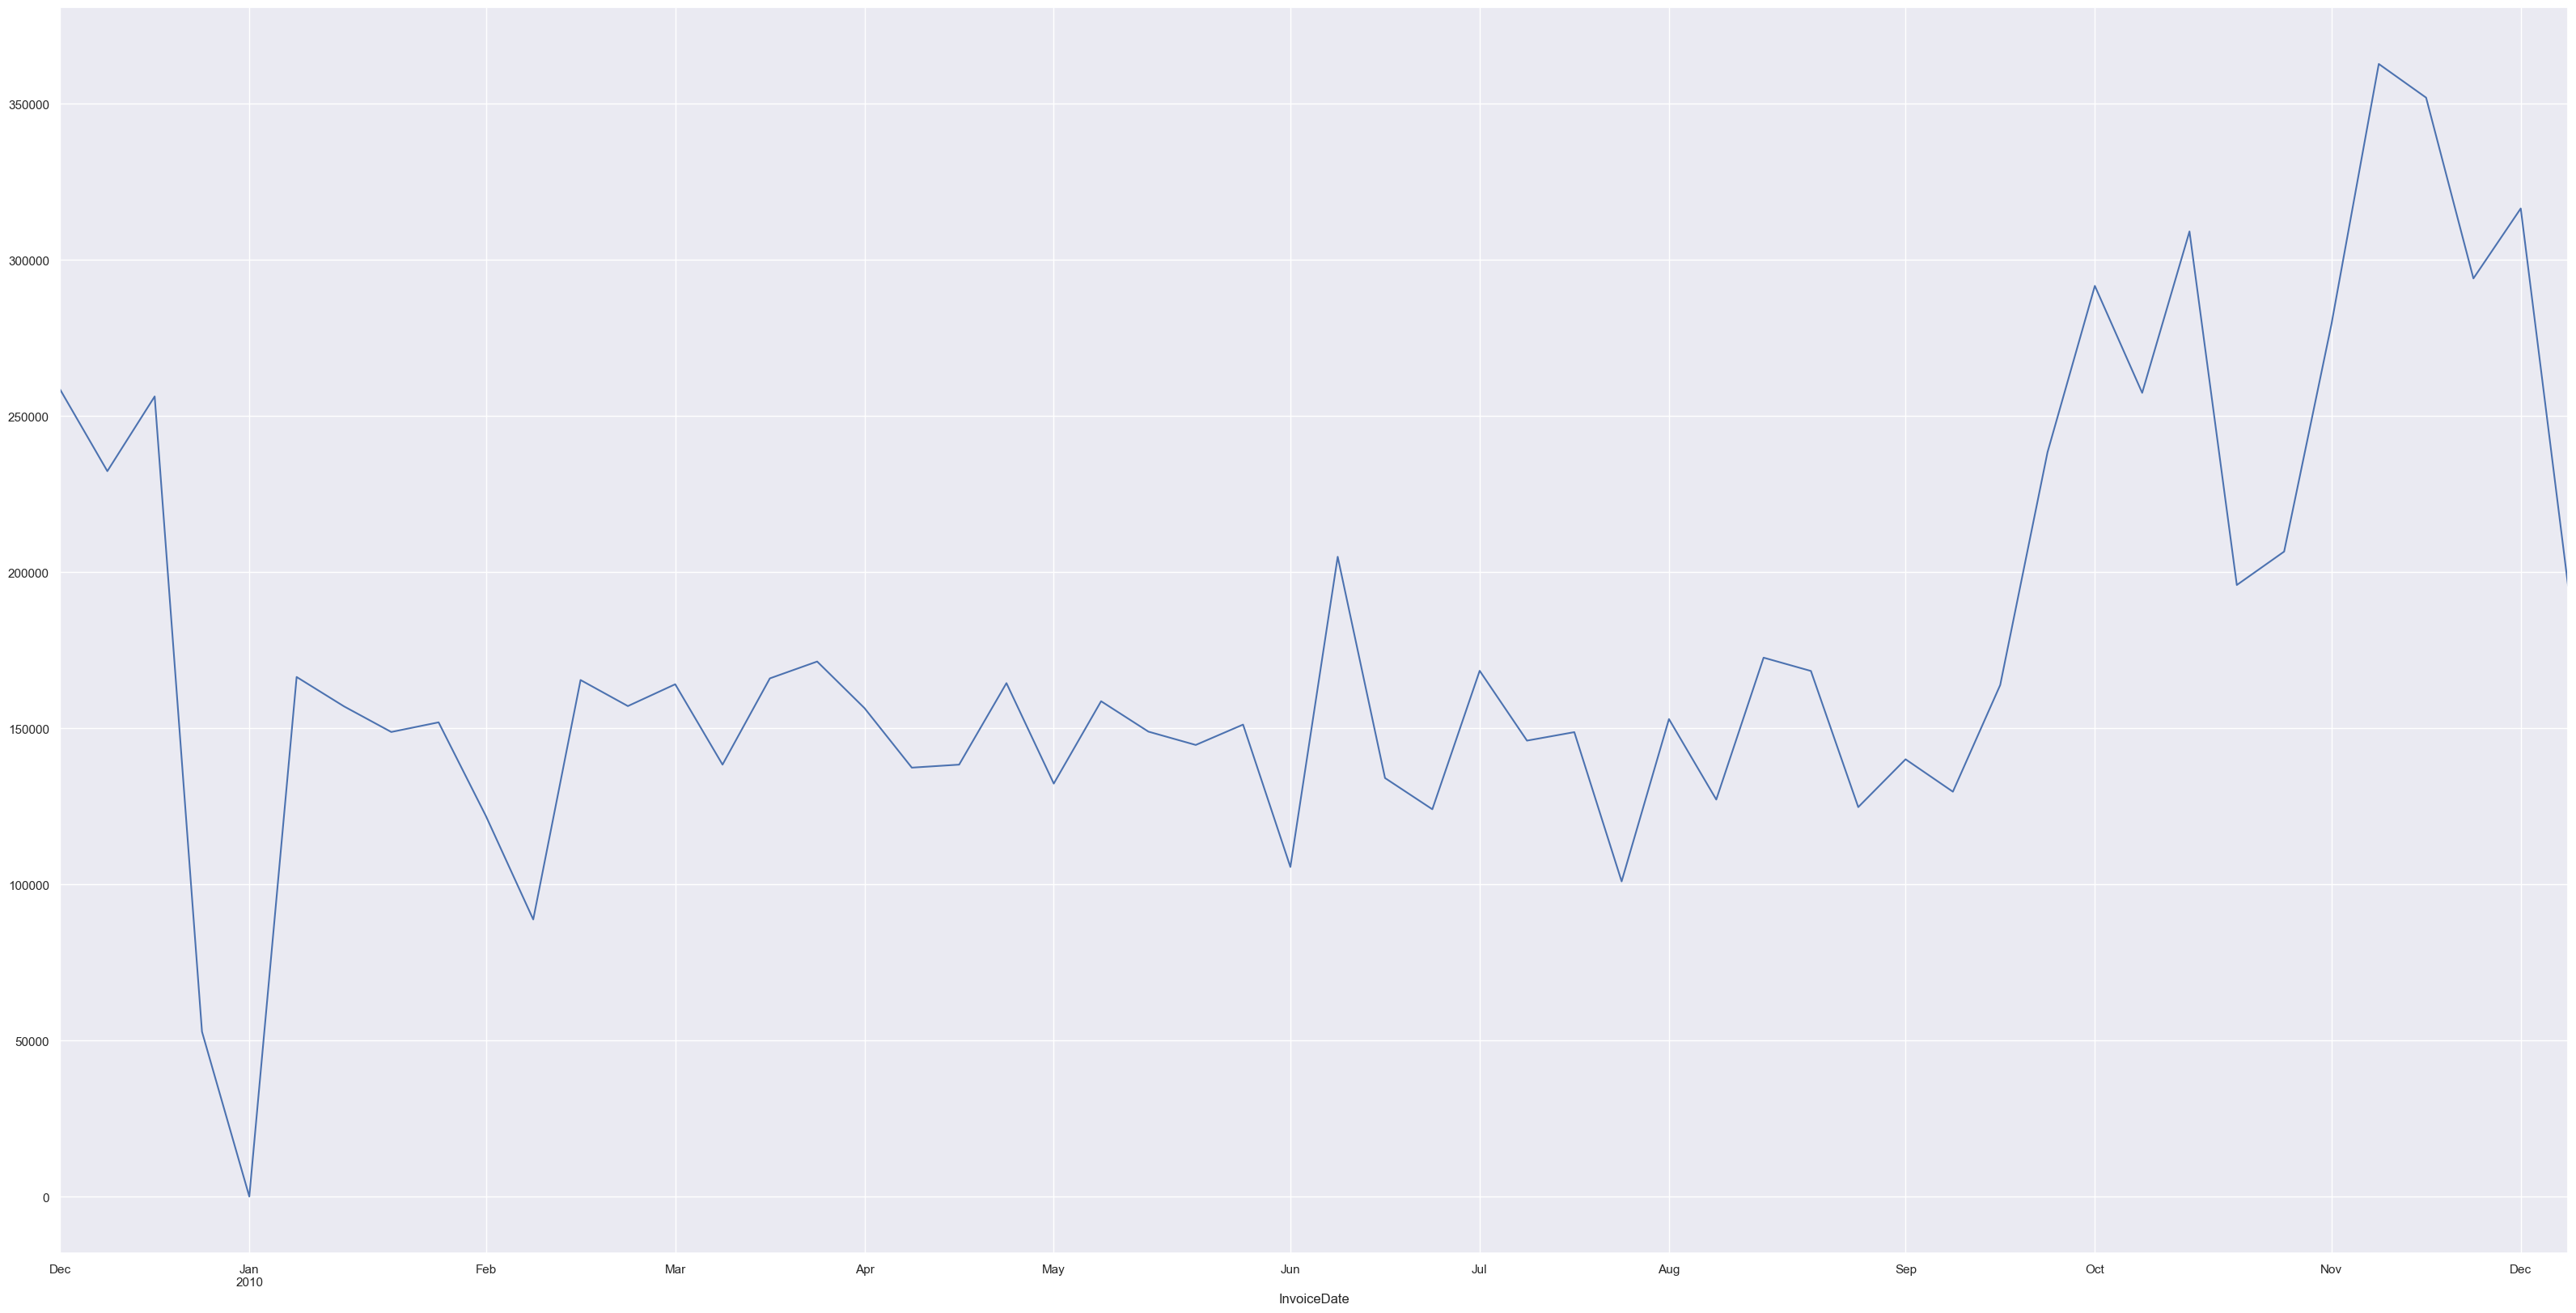

In [313]:
for var in ['Net_Price']:
    
    data[var].plot(figsize=(40,20))
    
    plt.show()

In [314]:
data.isna().sum()

Net_Price    0
dtype: int64

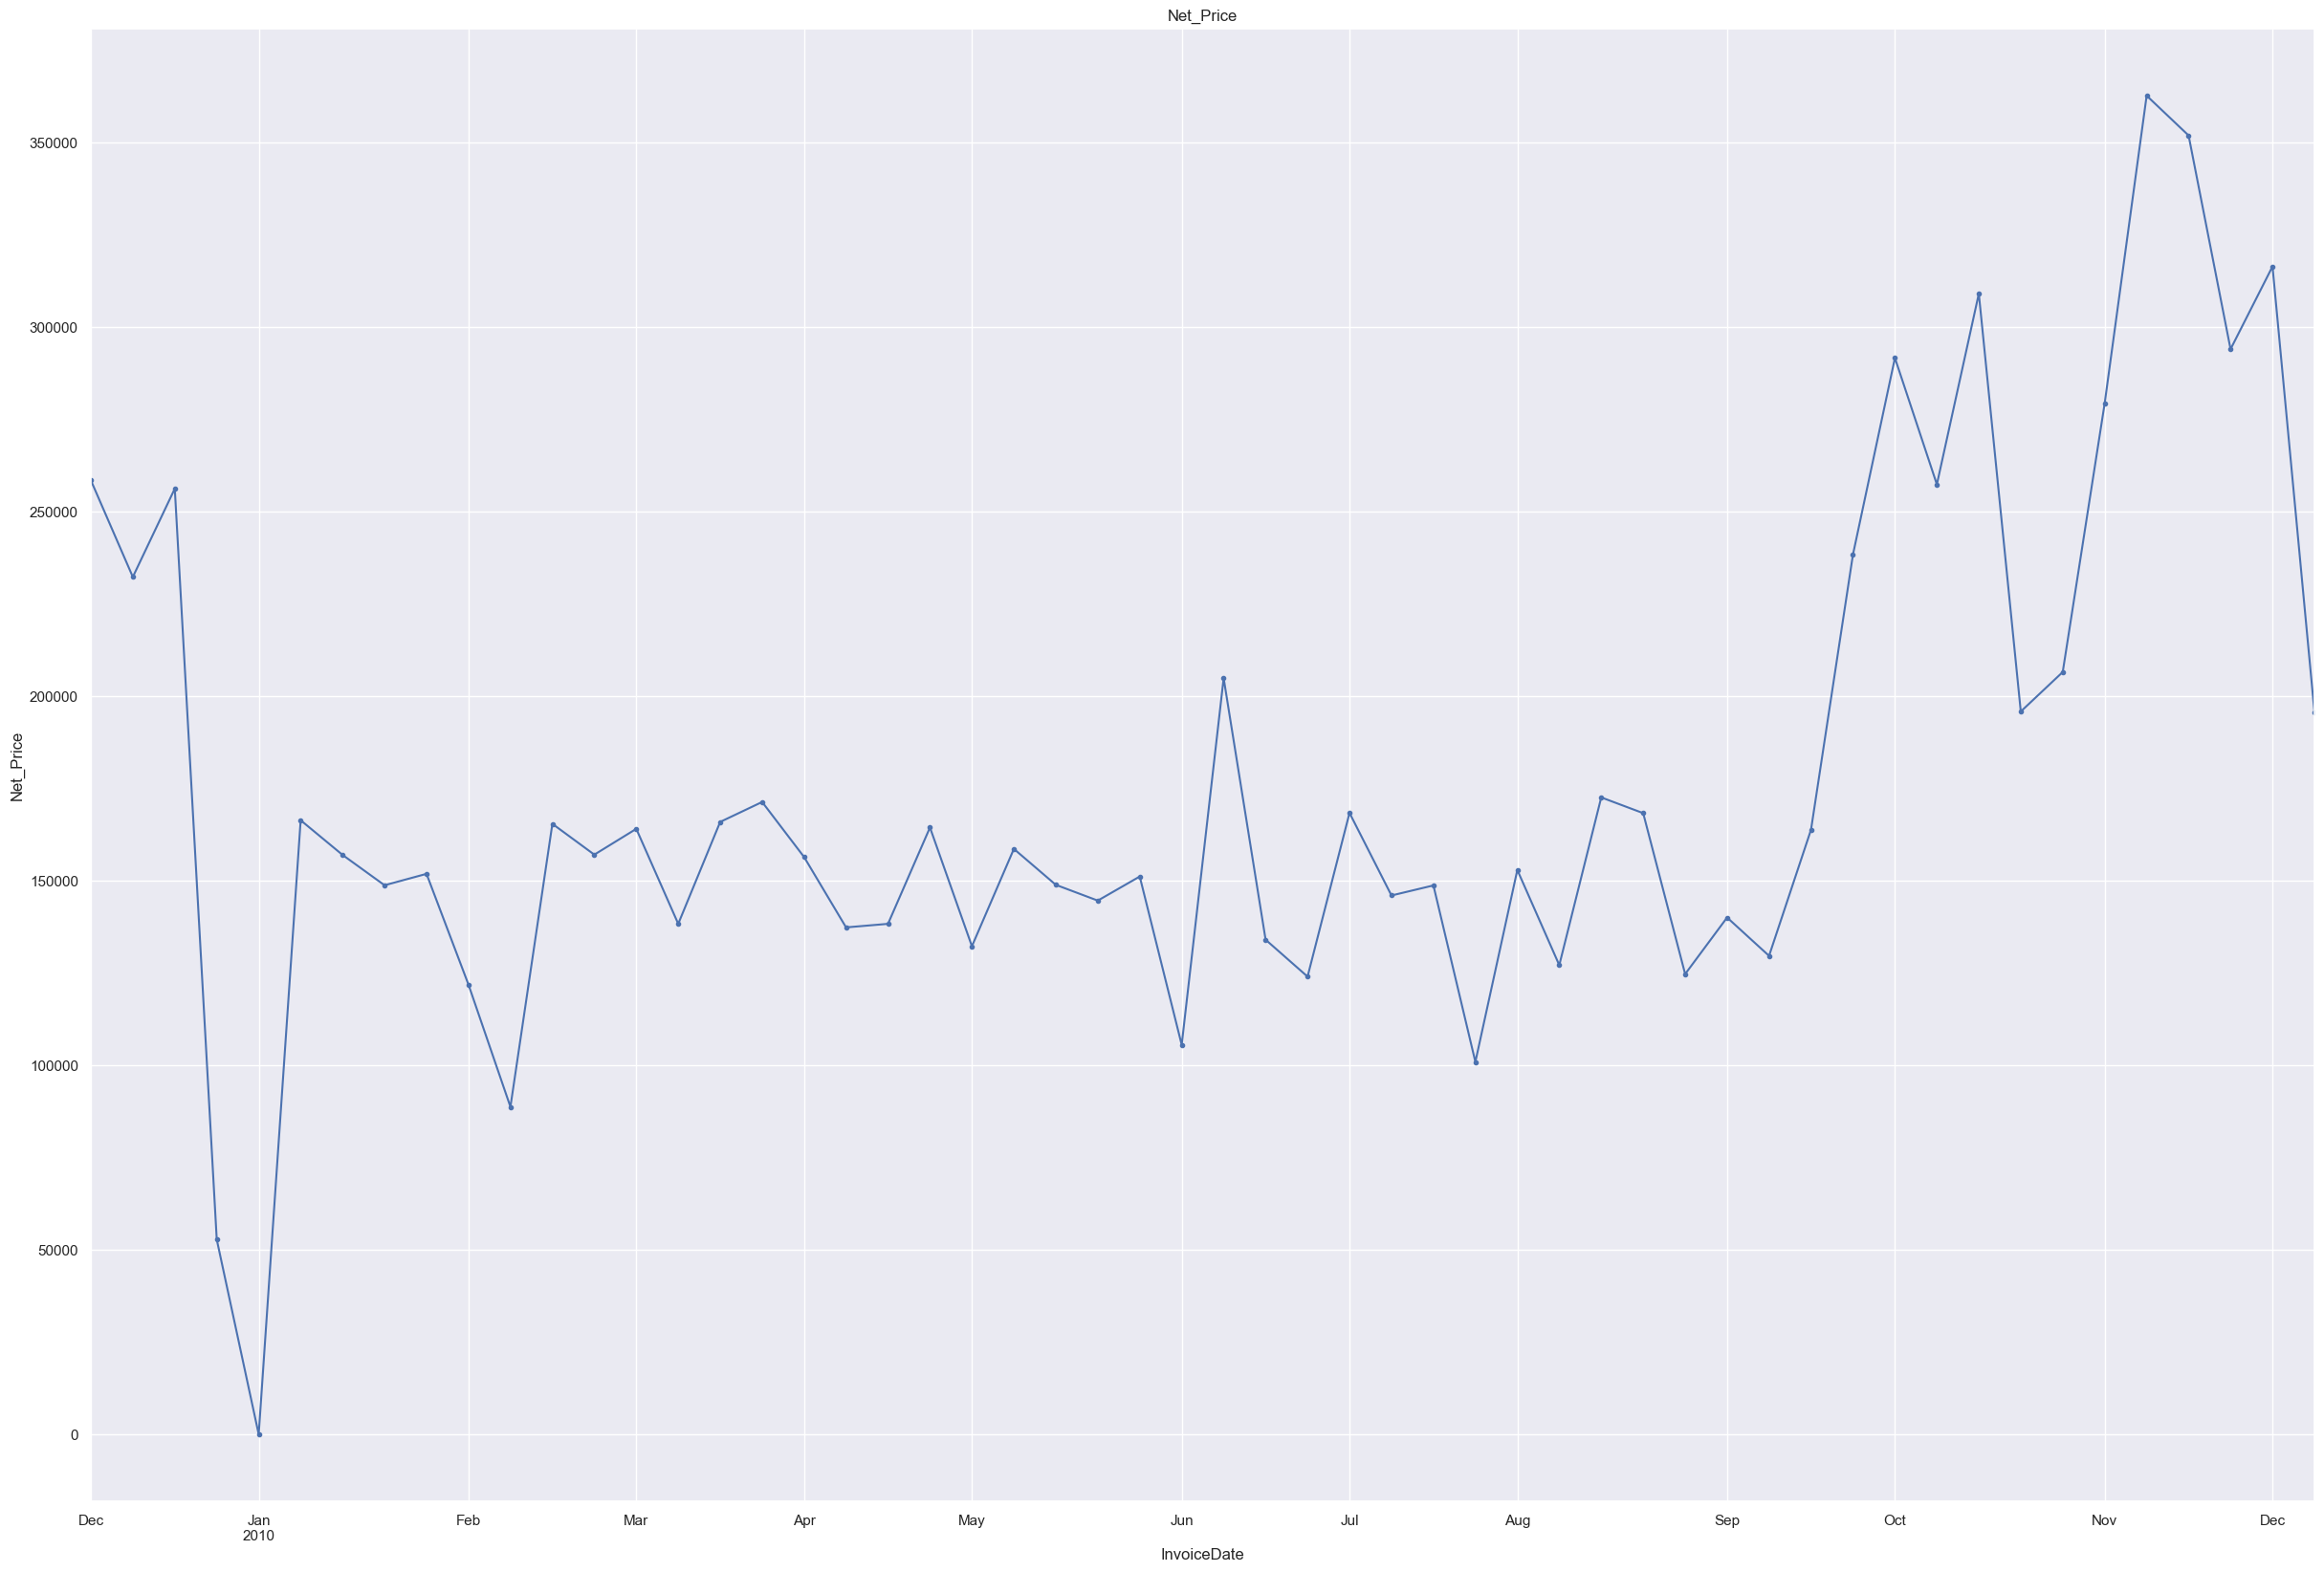

In [315]:
data_ = data.asfreq("1W")

# Apply the forward fill method.
data_imputed = data_.fillna(method="ffill")

# Plot the imputed time series.
for var in ["Net_Price"]:

    # plot the time series.
    ax = data_[var].plot(linestyle="-", marker=".", figsize=[30, 20])

    # plot the imputed values on top, in red.
    data_imputed[data_.isnull()][var].plot(ax=ax, legend=None, marker=".", color="r")

    # Add title.
    plt.title(var)

    # the y axis label
    plt.ylabel(var)

    plt.show()

In [316]:
month_ = data.index.month

month_ = pd.Series(month_, index=data.index)

month_.head()

InvoiceDate
2009-12-06    12
2009-12-13    12
2009-12-20    12
2009-12-27    12
2010-01-03     1
Freq: W-SUN, Name: InvoiceDate, dtype: int64

Text(0, 0.5, 'Net_Price')

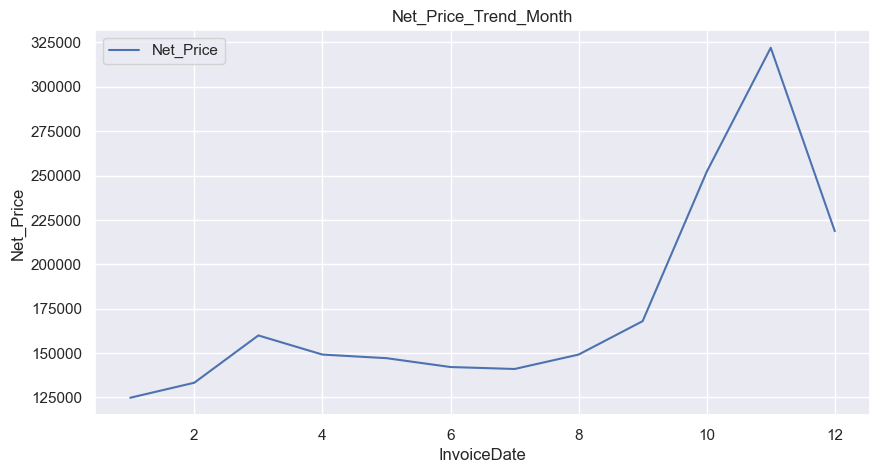

In [317]:
data.groupby(month_)[["Net_Price"]].mean().plot(figsize=(10, 5))
plt.title("Net_Price_Trend_Month")
plt.ylabel("Net_Price")

In [318]:
def week_of_month(dt):
    """ Return the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

data['Month']=data.index.month
data['Day']=data.index.day
data['Week']=data.index.isocalendar().week
data['wom'] = (data.index.day -1) //7 + 1


data

,Net_Price,Month,Day,Week,wom
InvoiceDate,,,,,
2009-12-06,258496.320,12,6,49,1
2009-12-13,232310.100,12,13,50,2
2009-12-20,256240.200,12,20,51,3
2009-12-27,52800.490,12,27,52,4
2010-01-03,0.000,1,3,53,1
2010-01-10,166393.590,1,10,1,2
2010-01-17,156990.910,1,17,2,3
2010-01-24,148777.541,1,24,3,4
2010-01-31,151870.851,1,31,4,5


In [319]:
cyclical = CyclicalFeatures(
    variables=["Month", "wom", "Day", "Week"],  # The features we want to transform.
    drop_original=False,  # Whether to drop the original features.
)

data = cyclical.fit_transform(data)

In [320]:
data

,Net_Price,Month,Day,Week,wom,Month_sin,Month_cos,wom_sin,wom_cos,Day_sin,Day_cos,Week_sin,Week_cos
InvoiceDate,,,,,,,,,,,,,
2009-12-06,258496.320,12,6,49,1,-2.449294e-16,1.000000e+00,9.510565e-01,0.309017,9.377521e-01,0.347305,-0.456629,0.889657
2009-12-13,232310.100,12,13,50,2,-2.449294e-16,1.000000e+00,5.877853e-01,-0.809017,4.853020e-01,-0.874347,-0.348202,0.93742
2009-12-20,256240.200,12,20,51,3,-2.449294e-16,1.000000e+00,-5.877853e-01,-0.809017,-7.907757e-01,-0.612106,-0.234886,0.972023
2009-12-27,52800.490,12,27,52,4,-2.449294e-16,1.000000e+00,-9.510565e-01,0.309017,-7.247928e-01,0.688967,-0.118273,0.992981
2010-01-03,0.000,1,3,53,1,5.000000e-01,8.660254e-01,9.510565e-01,0.309017,5.712682e-01,0.820763,-0.0,1.0
2010-01-10,166393.590,1,10,1,2,5.000000e-01,8.660254e-01,5.877853e-01,-0.809017,8.978045e-01,-0.440394,0.118273,0.992981
2010-01-17,156990.910,1,17,2,3,5.000000e-01,8.660254e-01,-5.877853e-01,-0.809017,-2.993631e-01,-0.954139,0.234886,0.972023
2010-01-24,148777.541,1,24,3,4,5.000000e-01,8.660254e-01,-9.510565e-01,0.309017,-9.884683e-01,0.151428,0.348202,0.93742
2010-01-31,151870.851,1,31,4,5,5.000000e-01,8.660254e-01,-2.449294e-16,1.000000,-2.449294e-16,1.000000,0.456629,0.889657


In [321]:
variables = ["Net_Price"]

# Shift the data forward 1 Hr.
tmp = data[variables].shift(freq="1W")

# Names for the new variables.
tmp.columns = [v + "_lag_1" for v in variables]

# Add the variables to the original data.
print("data size before")
print(data.shape)

data = data.merge(tmp, left_index=True, right_index=True, how="left")

print("data size after")
print(data.shape)

data.head()

data size before
(54, 13)
data size after
(54, 14)


,Net_Price,Month,Day,Week,wom,Month_sin,Month_cos,wom_sin,wom_cos,Day_sin,Day_cos,Week_sin,Week_cos,Net_Price_lag_1
InvoiceDate,,,,,,,,,,,,,,
2009-12-06,258496.32,12,6,49,1,-2.449294e-16,1.000000,0.951057,0.309017,0.937752,0.347305,-0.456629,0.889657,NaN
2009-12-13,232310.10,12,13,50,2,-2.449294e-16,1.000000,0.587785,-0.809017,0.485302,-0.874347,-0.348202,0.93742,258496.32
2009-12-20,256240.20,12,20,51,3,-2.449294e-16,1.000000,-0.587785,-0.809017,-0.790776,-0.612106,-0.234886,0.972023,232310.10
2009-12-27,52800.49,12,27,52,4,-2.449294e-16,1.000000,-0.951057,0.309017,-0.724793,0.688967,-0.118273,0.992981,256240.20
2010-01-03,0.00,1,3,53,1,5.000000e-01,0.866025,0.951057,0.309017,0.571268,0.820763,-0.0,1.0,52800.49


In [322]:
for window in [2, 4]:
    
    tmp = data["Net_Price"].rolling(window=window).agg(["mean", "max", "min"]).shift(1)

    tmp.columns = [f"sales_{window}_{func}" for func in ["mean", "max", "min"]]
    
    data = data.merge(tmp, left_index=True, right_index=True, how="left")

# view of the result
data

,Net_Price,Month,Day,Week,wom,Month_sin,Month_cos,wom_sin,wom_cos,Day_sin,Day_cos,Week_sin,Week_cos,Net_Price_lag_1,sales_2_mean,sales_2_max,sales_2_min,sales_4_mean,sales_4_max,sales_4_min
InvoiceDate,,,,,,,,,,,,,,,,,,,,
2009-12-06,258496.320,12,6,49,1,-2.449294e-16,1.000000e+00,9.510565e-01,0.309017,9.377521e-01,0.347305,-0.456629,0.889657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-13,232310.100,12,13,50,2,-2.449294e-16,1.000000e+00,5.877853e-01,-0.809017,4.853020e-01,-0.874347,-0.348202,0.93742,258496.320,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-20,256240.200,12,20,51,3,-2.449294e-16,1.000000e+00,-5.877853e-01,-0.809017,-7.907757e-01,-0.612106,-0.234886,0.972023,232310.100,245403.2100,258496.320,232310.100,NaN,NaN,NaN
2009-12-27,52800.490,12,27,52,4,-2.449294e-16,1.000000e+00,-9.510565e-01,0.309017,-7.247928e-01,0.688967,-0.118273,0.992981,256240.200,244275.1500,256240.200,232310.100,NaN,NaN,NaN
2010-01-03,0.000,1,3,53,1,5.000000e-01,8.660254e-01,9.510565e-01,0.309017,5.712682e-01,0.820763,-0.0,1.0,52800.490,154520.3450,256240.200,52800.490,199961.77750,258496.320,52800.490
2010-01-10,166393.590,1,10,1,2,5.000000e-01,8.660254e-01,5.877853e-01,-0.809017,8.978045e-01,-0.440394,0.118273,0.992981,0.000,26400.2450,52800.490,0.000,135337.69750,256240.200,0.000
2010-01-17,156990.910,1,17,2,3,5.000000e-01,8.660254e-01,-5.877853e-01,-0.809017,-2.993631e-01,-0.954139,0.234886,0.972023,166393.590,83196.7950,166393.590,0.000,118858.57000,256240.200,0.000
2010-01-24,148777.541,1,24,3,4,5.000000e-01,8.660254e-01,-9.510565e-01,0.309017,-9.884683e-01,0.151428,0.348202,0.93742,156990.910,161692.2500,166393.590,156990.910,94046.24750,166393.590,0.000
2010-01-31,151870.851,1,31,4,5,5.000000e-01,8.660254e-01,-2.449294e-16,1.000000,-2.449294e-16,1.000000,0.456629,0.889657,148777.541,152884.2255,156990.910,148777.541,118040.51025,166393.590,0.000


In [323]:
data.dropna(inplace=True)

In [324]:
data['Week']=data['Week'].astype('int64')
data.dtypes

Net_Price          float64
Month                int64
Day                  int64
Week                 int64
wom                  int64
Month_sin          float64
Month_cos          float64
wom_sin            float64
wom_cos            float64
Day_sin            float64
Day_cos            float64
Week_sin           Float64
Week_cos           Float64
Net_Price_lag_1    float64
sales_2_mean       float64
sales_2_max        float64
sales_2_min        float64
sales_4_mean       float64
sales_4_max        float64
sales_4_min        float64
dtype: object

In [325]:
X_train = data[data.index <= "2010-10-09"]
X_test = data[data.index > "2010-10-09"]

X_train.shape, X_test.shape

((40, 20), (10, 20))

In [326]:
# the target variable
y_train = X_train["Net_Price"].copy()
y_test = X_test["Net_Price"].copy()

# the input features
X_train = X_train.drop("Net_Price", axis=1)
X_test = X_test.drop("Net_Price", axis=1)

In [327]:
print("train rmse: ", mean_squared_error(
    y_train, X_train["Net_Price_lag_1"], squared=False,))

print("test rmse: ",  mean_squared_error(
    y_test, X_test["Net_Price_lag_1"], squared=False,))

train rmse:  45370.52346256667
test rmse:  68989.09647768691


In [352]:
# Define the model with GridSearchCV for hyperparameter tuning
model = RandomForestRegressor()

# Define the grid of parameters to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': np.arange(5,15)
}

# Apply GridSearchCV to the pipeline
grid_search = HalvingGridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Train the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

n_iterations: 2
n_required_iterations: 3
n_possible_iterations: 2
min_resources_: 10
max_resources_: 40
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 10
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 1
n_candidates: 7
n_resources: 30
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters:  {'max_depth': 13, 'n_estimators': 100}


In [353]:
print("For Training Data:")

# Make predictions on the test data
y_pred_train = grid_search.predict(X_train)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train=mean_squared_error(y_train, y_pred_train)

print("Mean Absolute Error: ", mae_train)
print("R2 Score: ", r2_train)
print("Mean Squared Error: ", mse_train)

print("For Test Data:")

# Make predictions on the test data
y_pred_test = grid_search.predict(X_test)

# Evaluate the model
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test=mean_squared_error(y_test, y_pred_test)

print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

For Training Data:
Mean Absolute Error:  9966.59687109375
R2 Score:  0.8402118873689931
Mean Squared Error:  275335578.64022255
For Test Data:
Mean Absolute Error:  132799.072234375
R2 Score:  -5.791326304489776
Mean Squared Error:  23358129107.20734


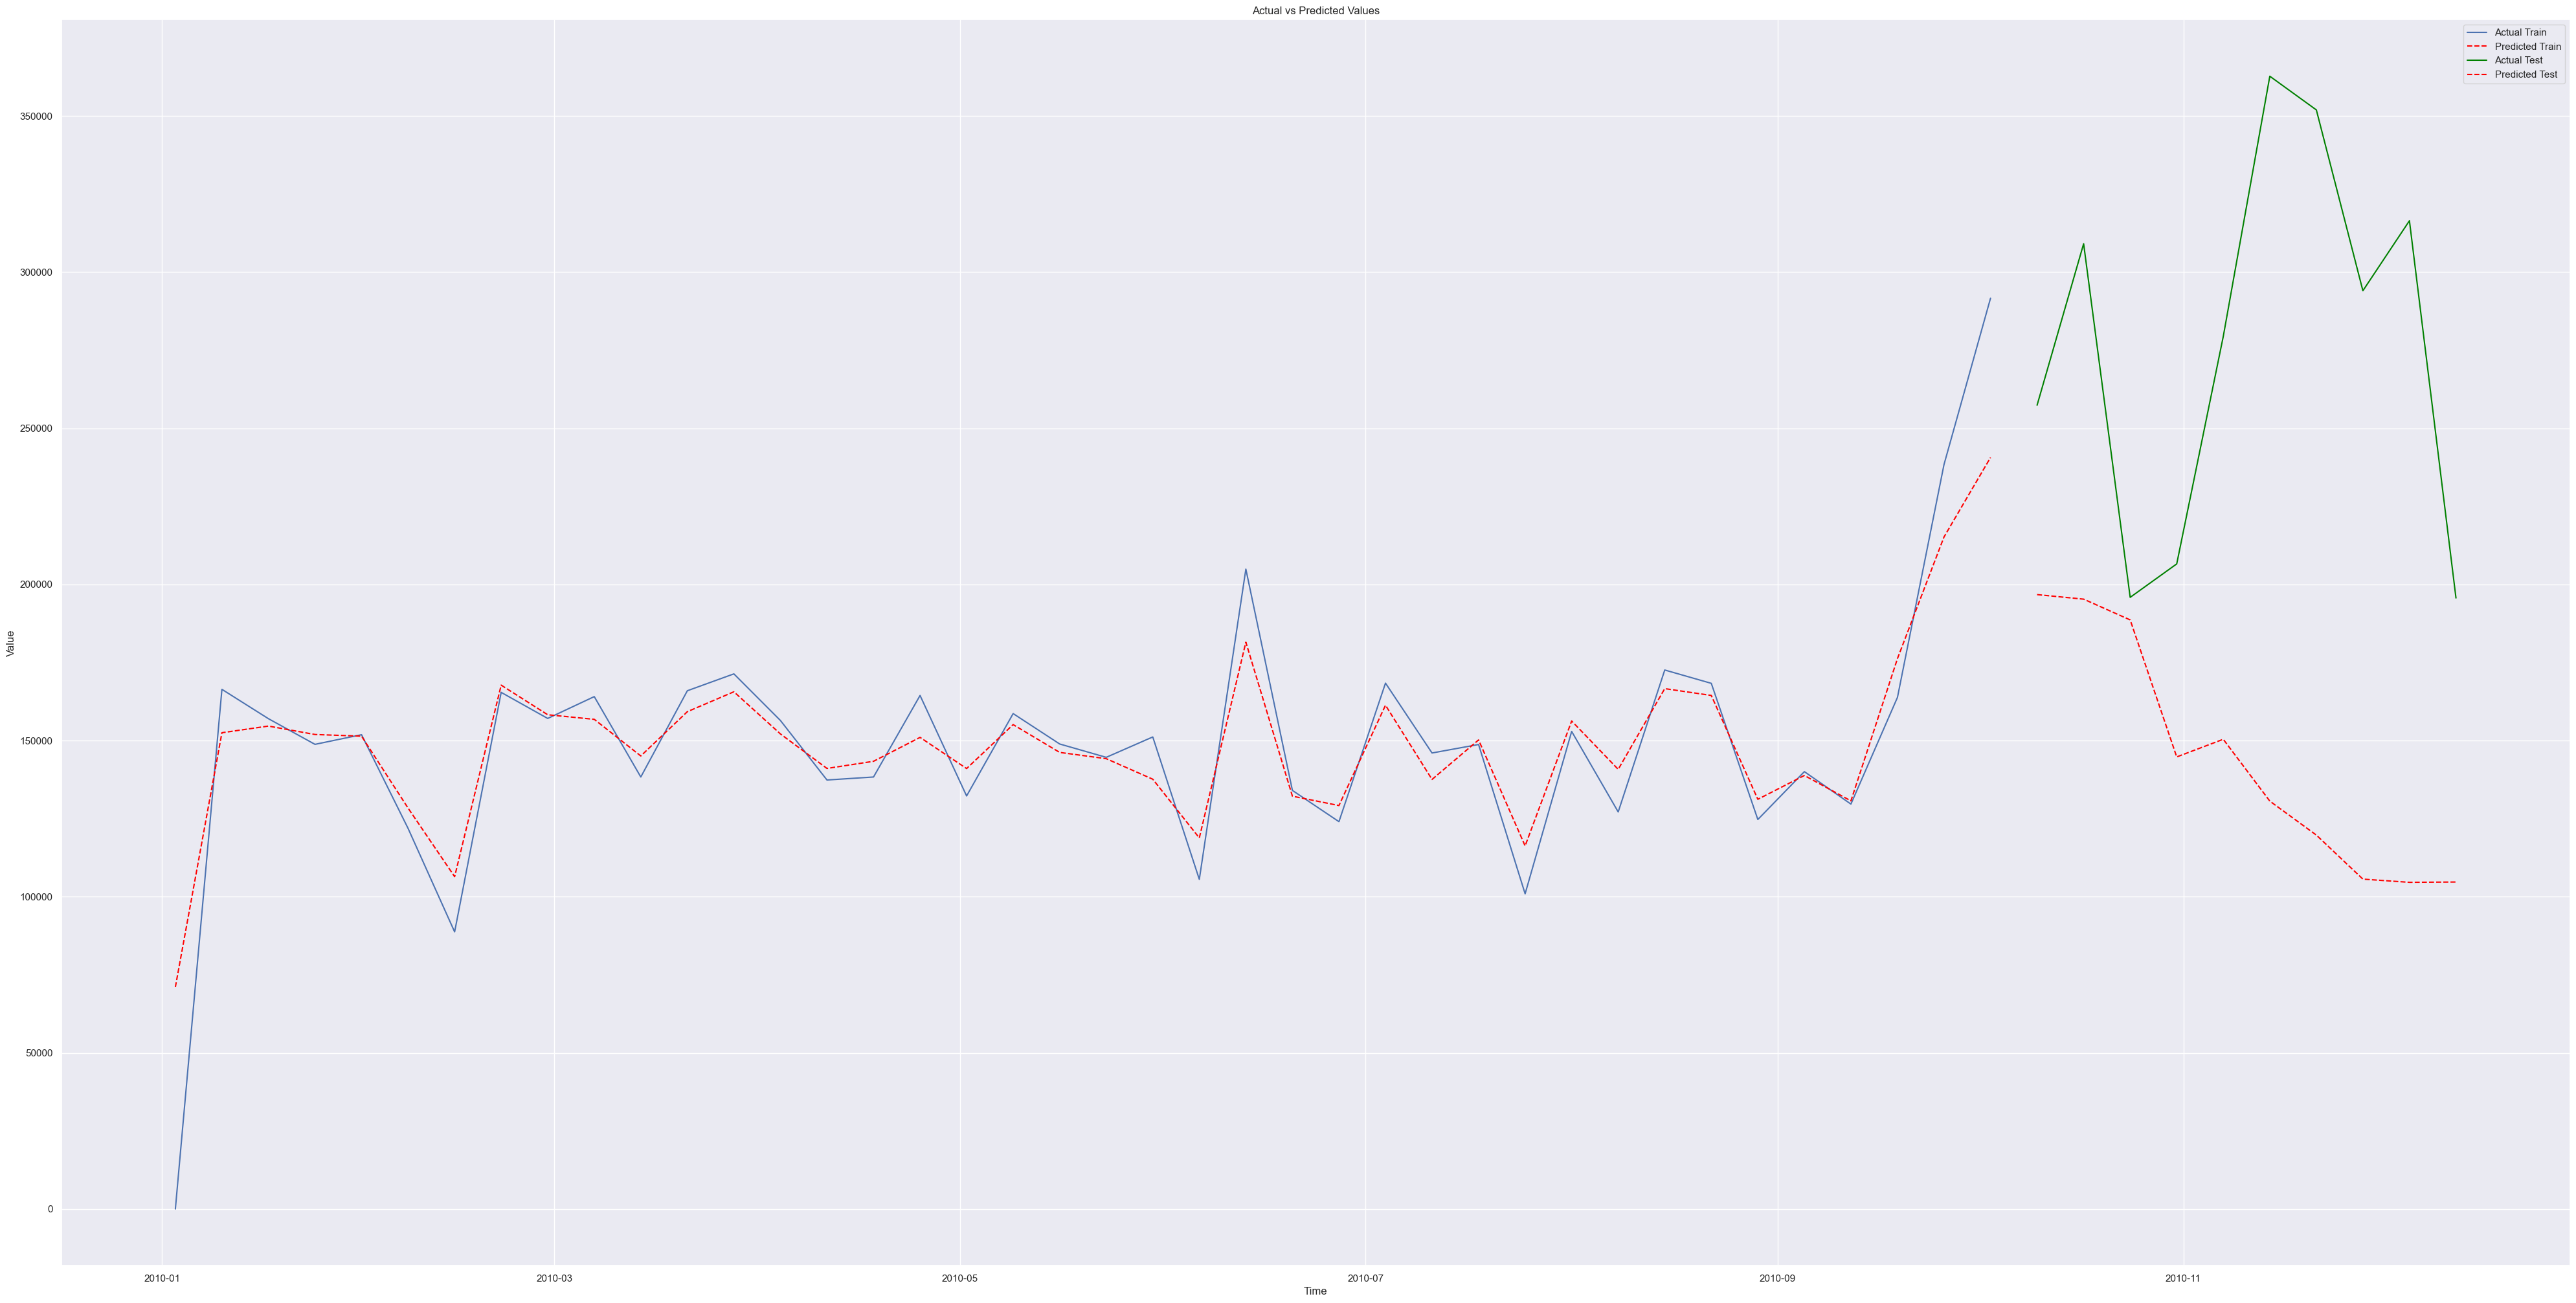

In [354]:
plt.figure(figsize=(50, 25))  # Set the figure size
plt.plot(y_train.index, y_train, label='Actual Train')  # Plot the actual values
plt.plot(y_train.index, y_pred_train, label='Predicted Train', linestyle='--', color='red')  # Plot the predicted values
plt.plot(y_test.index, y_test, label='Actual Test', color='green')  # Plot the actual values
plt.plot(y_test.index, y_pred_test, label='Predicted Test', linestyle='--', color='red')  # Plot the predicted values
plt.xlabel('Time')  # Label x-axis
plt.ylabel('Value')  # Label y-axis
plt.title('Actual vs Predicted Values')  # Title of the plot
plt.legend()  # Add a legend
plt.show()  # Display the plot

In [355]:
# Define the model
ridge = Ridge()

params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = HalvingGridSearchCV(ridge, params,scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, cv=5)

ridge_regressor.fit(X_train, y_train)

n_iterations: 2
n_required_iterations: 3
n_possible_iterations: 2
min_resources_: 10
max_resources_: 40
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 10
n_resources: 10
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 4
n_resources: 30
Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\Admin\anaconda3\envs\bright\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.95808e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


HalvingGridSearchCV(estimator=Ridge(), n_jobs=-1,
                    param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001,
                                          0.01, 1, 5, 10, 20]},
                    scoring='neg_mean_squared_error', verbose=2)

In [356]:
print("For Training Data:")

# Make predictions on the test data
y_pred_train = ridge_regressor.predict(X_train)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train=mean_squared_error(y_train, y_pred_train)

print("Mean Absolute Error: ", mae_train)
print("R2 Score: ", r2_train)
print("Mean Squared Error: ", mse_train)

print("For Test Data:")

# Make predictions on the test data
y_pred_test = ridge_regressor.predict(X_test)

# Evaluate the model
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test=mean_squared_error(y_test, y_pred_test)

print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

For Training Data:
Mean Absolute Error:  22489.006
R2 Score:  0.49086538841811844
Mean Squared Error:  877304800.0
For Test Data:
Mean Absolute Error:  106441.414
R2 Score:  -2.998533113376029
Mean Squared Error:  13752579000.0


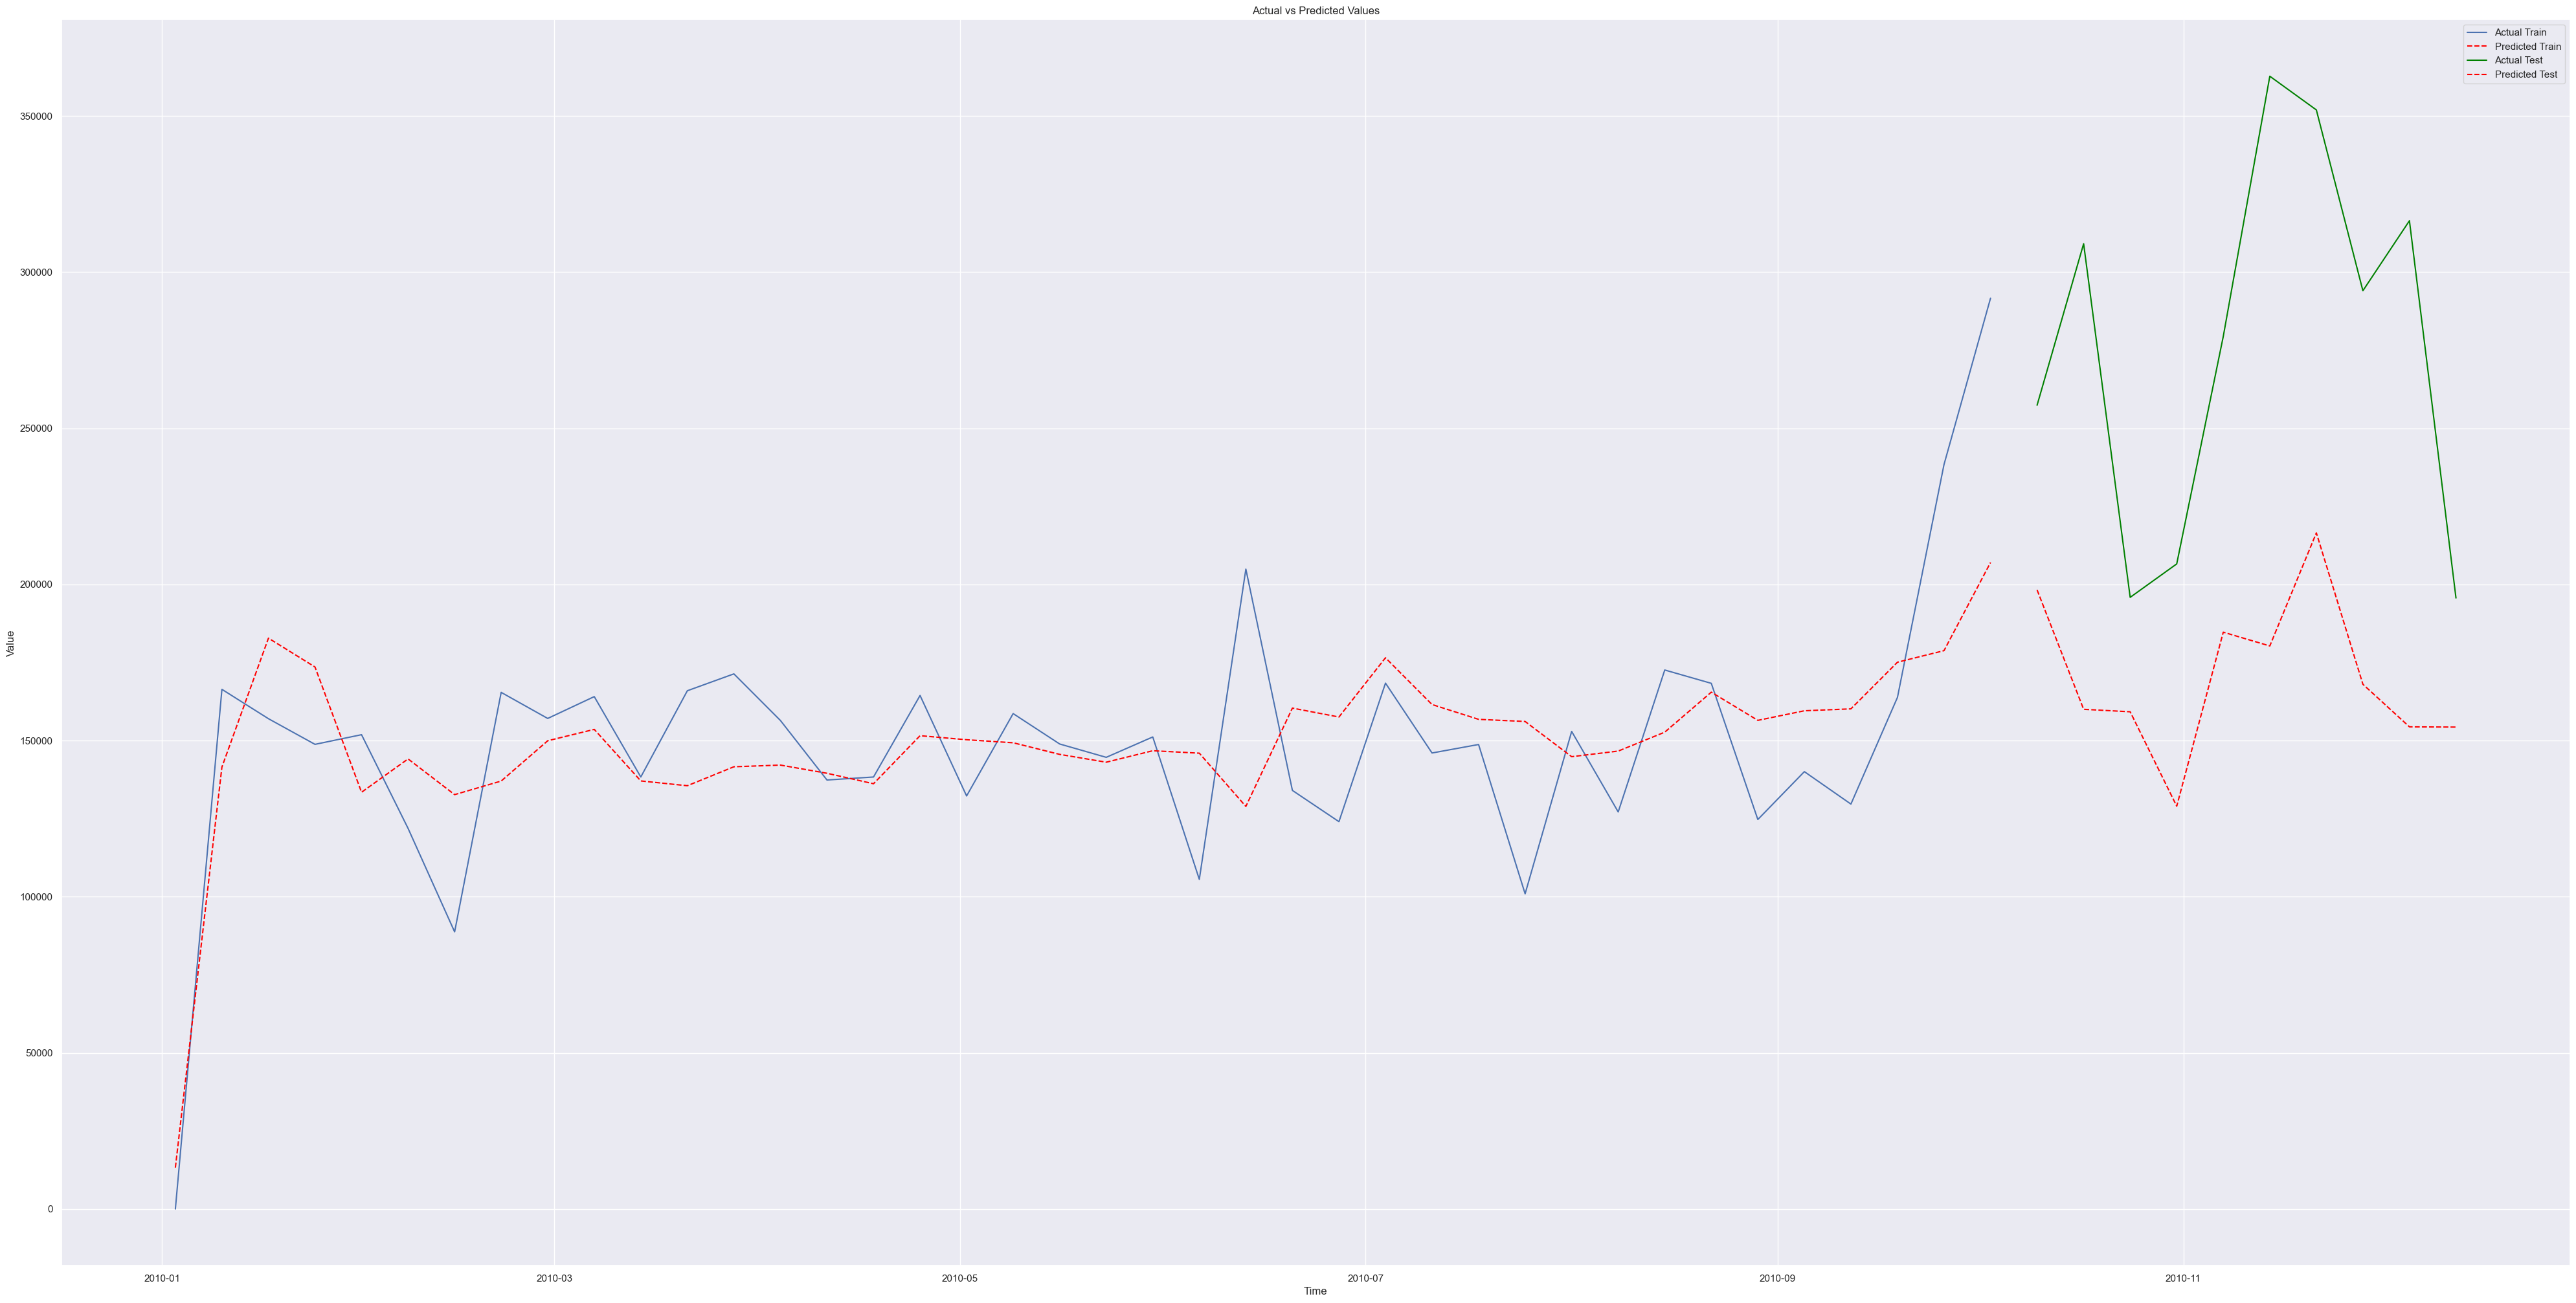

In [357]:
plt.figure(figsize=(50, 25))  # Set the figure size
plt.plot(y_train.index, y_train, label='Actual Train')  # Plot the actual values
plt.plot(y_train.index, y_pred_train, label='Predicted Train', linestyle='--', color='red')  # Plot the predicted values
plt.plot(y_test.index, y_test, label='Actual Test', color='green')  # Plot the actual values
plt.plot(y_test.index, y_pred_test, label='Predicted Test', linestyle='--', color='red')  # Plot the predicted values
plt.xlabel('Time')  # Label x-axis
plt.ylabel('Value')  # Label y-axis
plt.title('Actual vs Predicted Values')  # Title of the plot
plt.legend()  # Add a legend
plt.show()  # Display the plot

In [358]:
lasso = Lasso()

params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = HalvingGridSearchCV(lasso, params, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, cv=5)

lasso_regressor.fit(X_train, y_train)

n_iterations: 2
n_required_iterations: 3
n_possible_iterations: 2
min_resources_: 10
max_resources_: 40
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 10
n_resources: 10
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 4
n_resources: 30
Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\Admin\anaconda3\envs\bright\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.499e+09, tolerance: 6.893e+06
  model = cd_fast.enet_coordinate_descent(


HalvingGridSearchCV(estimator=Lasso(), n_jobs=-1,
                    param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001,
                                          0.01, 1, 5, 10, 20]},
                    scoring='neg_mean_squared_error', verbose=2)

In [359]:
print("For Training Data:")

# Make predictions on the test data
y_pred_train = lasso_regressor.predict(X_train)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train=mean_squared_error(y_train, y_pred_train)

print("Mean Absolute Error: ", mae_train)
print("R2 Score: ", r2_train)
print("Mean Squared Error: ", mse_train)

print("For Test Data:")

# Make predictions on the test data
y_pred_test = lasso_regressor.predict(X_test)

# Evaluate the model
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test=mean_squared_error(y_test, y_pred_test)

print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

For Training Data:
Mean Absolute Error:  16856.309
R2 Score:  0.720405549626842
Mean Squared Error:  481777340.0
For Test Data:
Mean Absolute Error:  47395.918
R2 Score:  -0.13693438594901264
Mean Squared Error:  3910379000.0


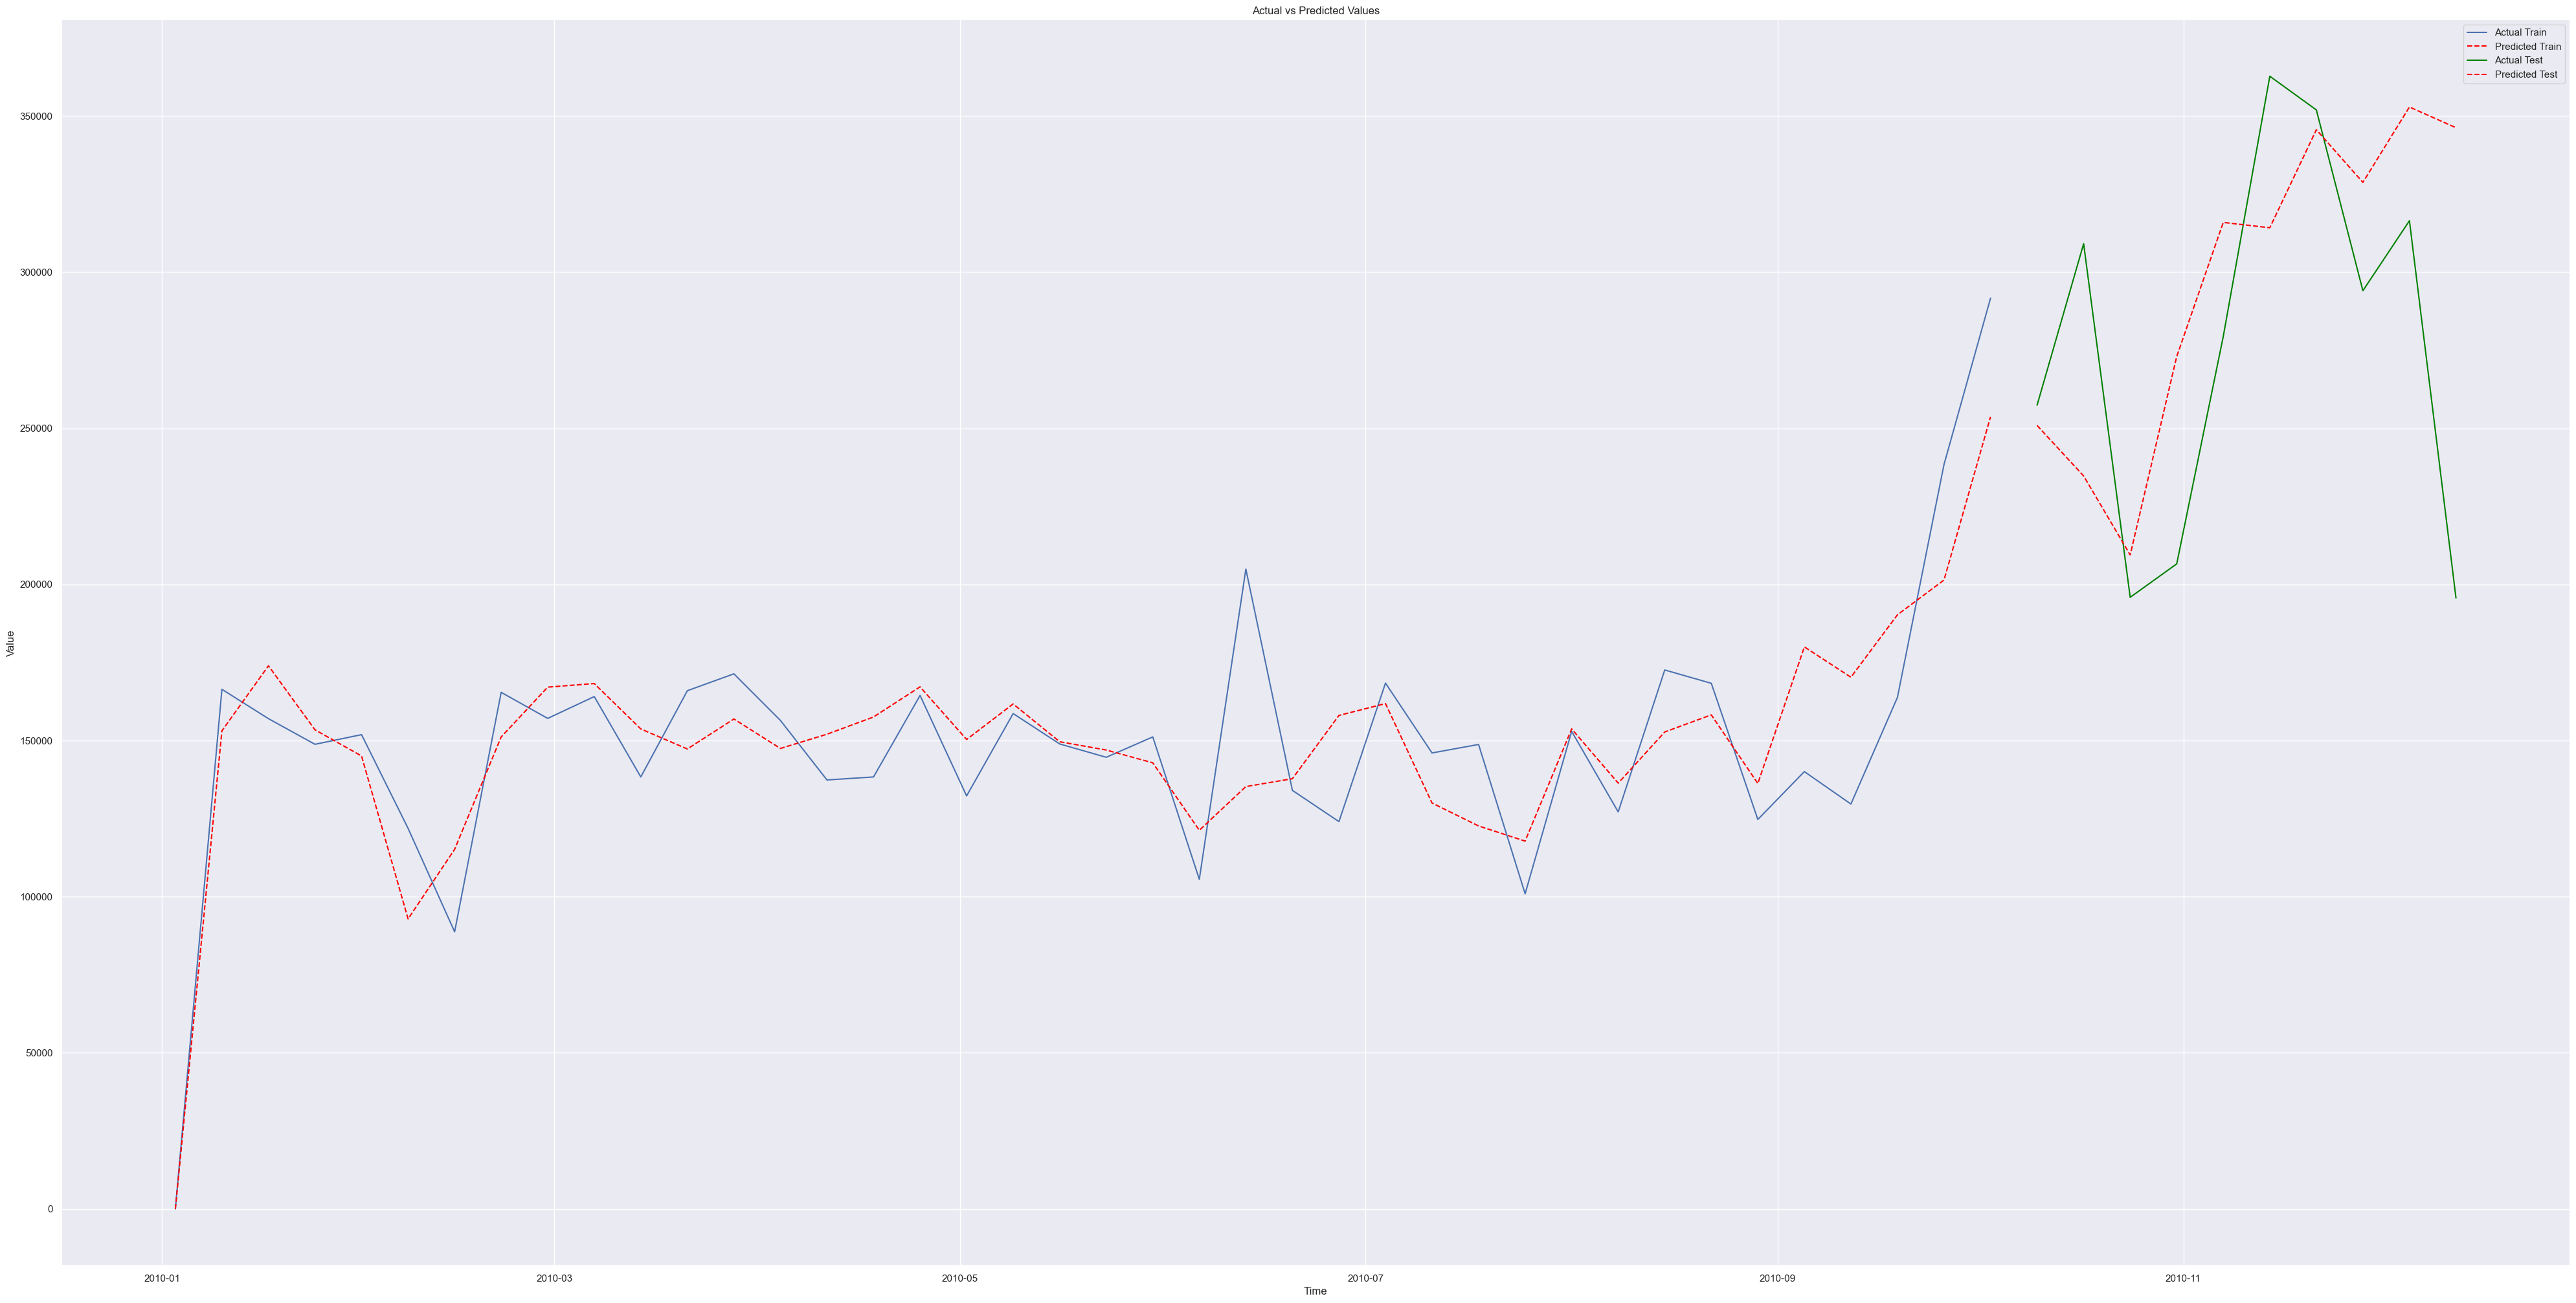

In [360]:
plt.figure(figsize=(50, 25))  # Set the figure size
plt.plot(y_train.index, y_train, label='Actual Train')  # Plot the actual values
plt.plot(y_train.index, y_pred_train, label='Predicted Train', linestyle='--', color='red')  # Plot the predicted values
plt.plot(y_test.index, y_test, label='Actual Test', color='green')  # Plot the actual values
plt.plot(y_test.index, y_pred_test, label='Predicted Test', linestyle='--', color='red')  # Plot the predicted values
plt.xlabel('Time')  # Label x-axis
plt.ylabel('Value')  # Label y-axis
plt.title('Actual vs Predicted Values')  # Title of the plot
plt.legend()  # Add a legend
plt.show()  # Display the plot

In [361]:
elastic_net = ElasticNet()

params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20],
          'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

elastic_net_regressor = HalvingGridSearchCV(elastic_net, params, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, cv=5)

elastic_net_regressor.fit(X_train, y_train)


n_iterations: 2
n_required_iterations: 5
n_possible_iterations: 2
min_resources_: 10
max_resources_: 40
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 110
n_resources: 10
Fitting 5 folds for each of 110 candidates, totalling 550 fits
----------
iter: 1
n_candidates: 37
n_resources: 30
Fitting 5 folds for each of 37 candidates, totalling 185 fits


C:\Users\Admin\anaconda3\envs\bright\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.059e+10, tolerance: 6.893e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


HalvingGridSearchCV(estimator=ElasticNet(), n_jobs=-1,
                    param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001,
                                          0.01, 1, 5, 10, 20],
                                'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                             0.7, 0.8, 0.9, 1]},
                    scoring='neg_mean_squared_error', verbose=2)

In [362]:
print("For Training Data:")

# Make predictions on the test data
y_pred_train = elastic_net_regressor.predict(X_train)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train=mean_squared_error(y_train, y_pred_train)

print("Mean Absolute Error: ", mae_train)
print("R2 Score: ", r2_train)
print("Mean Squared Error: ", mse_train)

print("For Test Data:")

# Make predictions on the test data
y_pred_test = elastic_net_regressor.predict(X_test)

# Evaluate the model
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test=mean_squared_error(y_test, y_pred_test)

print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

For Training Data:
Mean Absolute Error:  24104.203
R2 Score:  0.406431910045024
Mean Squared Error:  1022794560.0
For Test Data:
Mean Absolute Error:  148171.98
R2 Score:  -6.178472151980949
Mean Squared Error:  24689682000.0


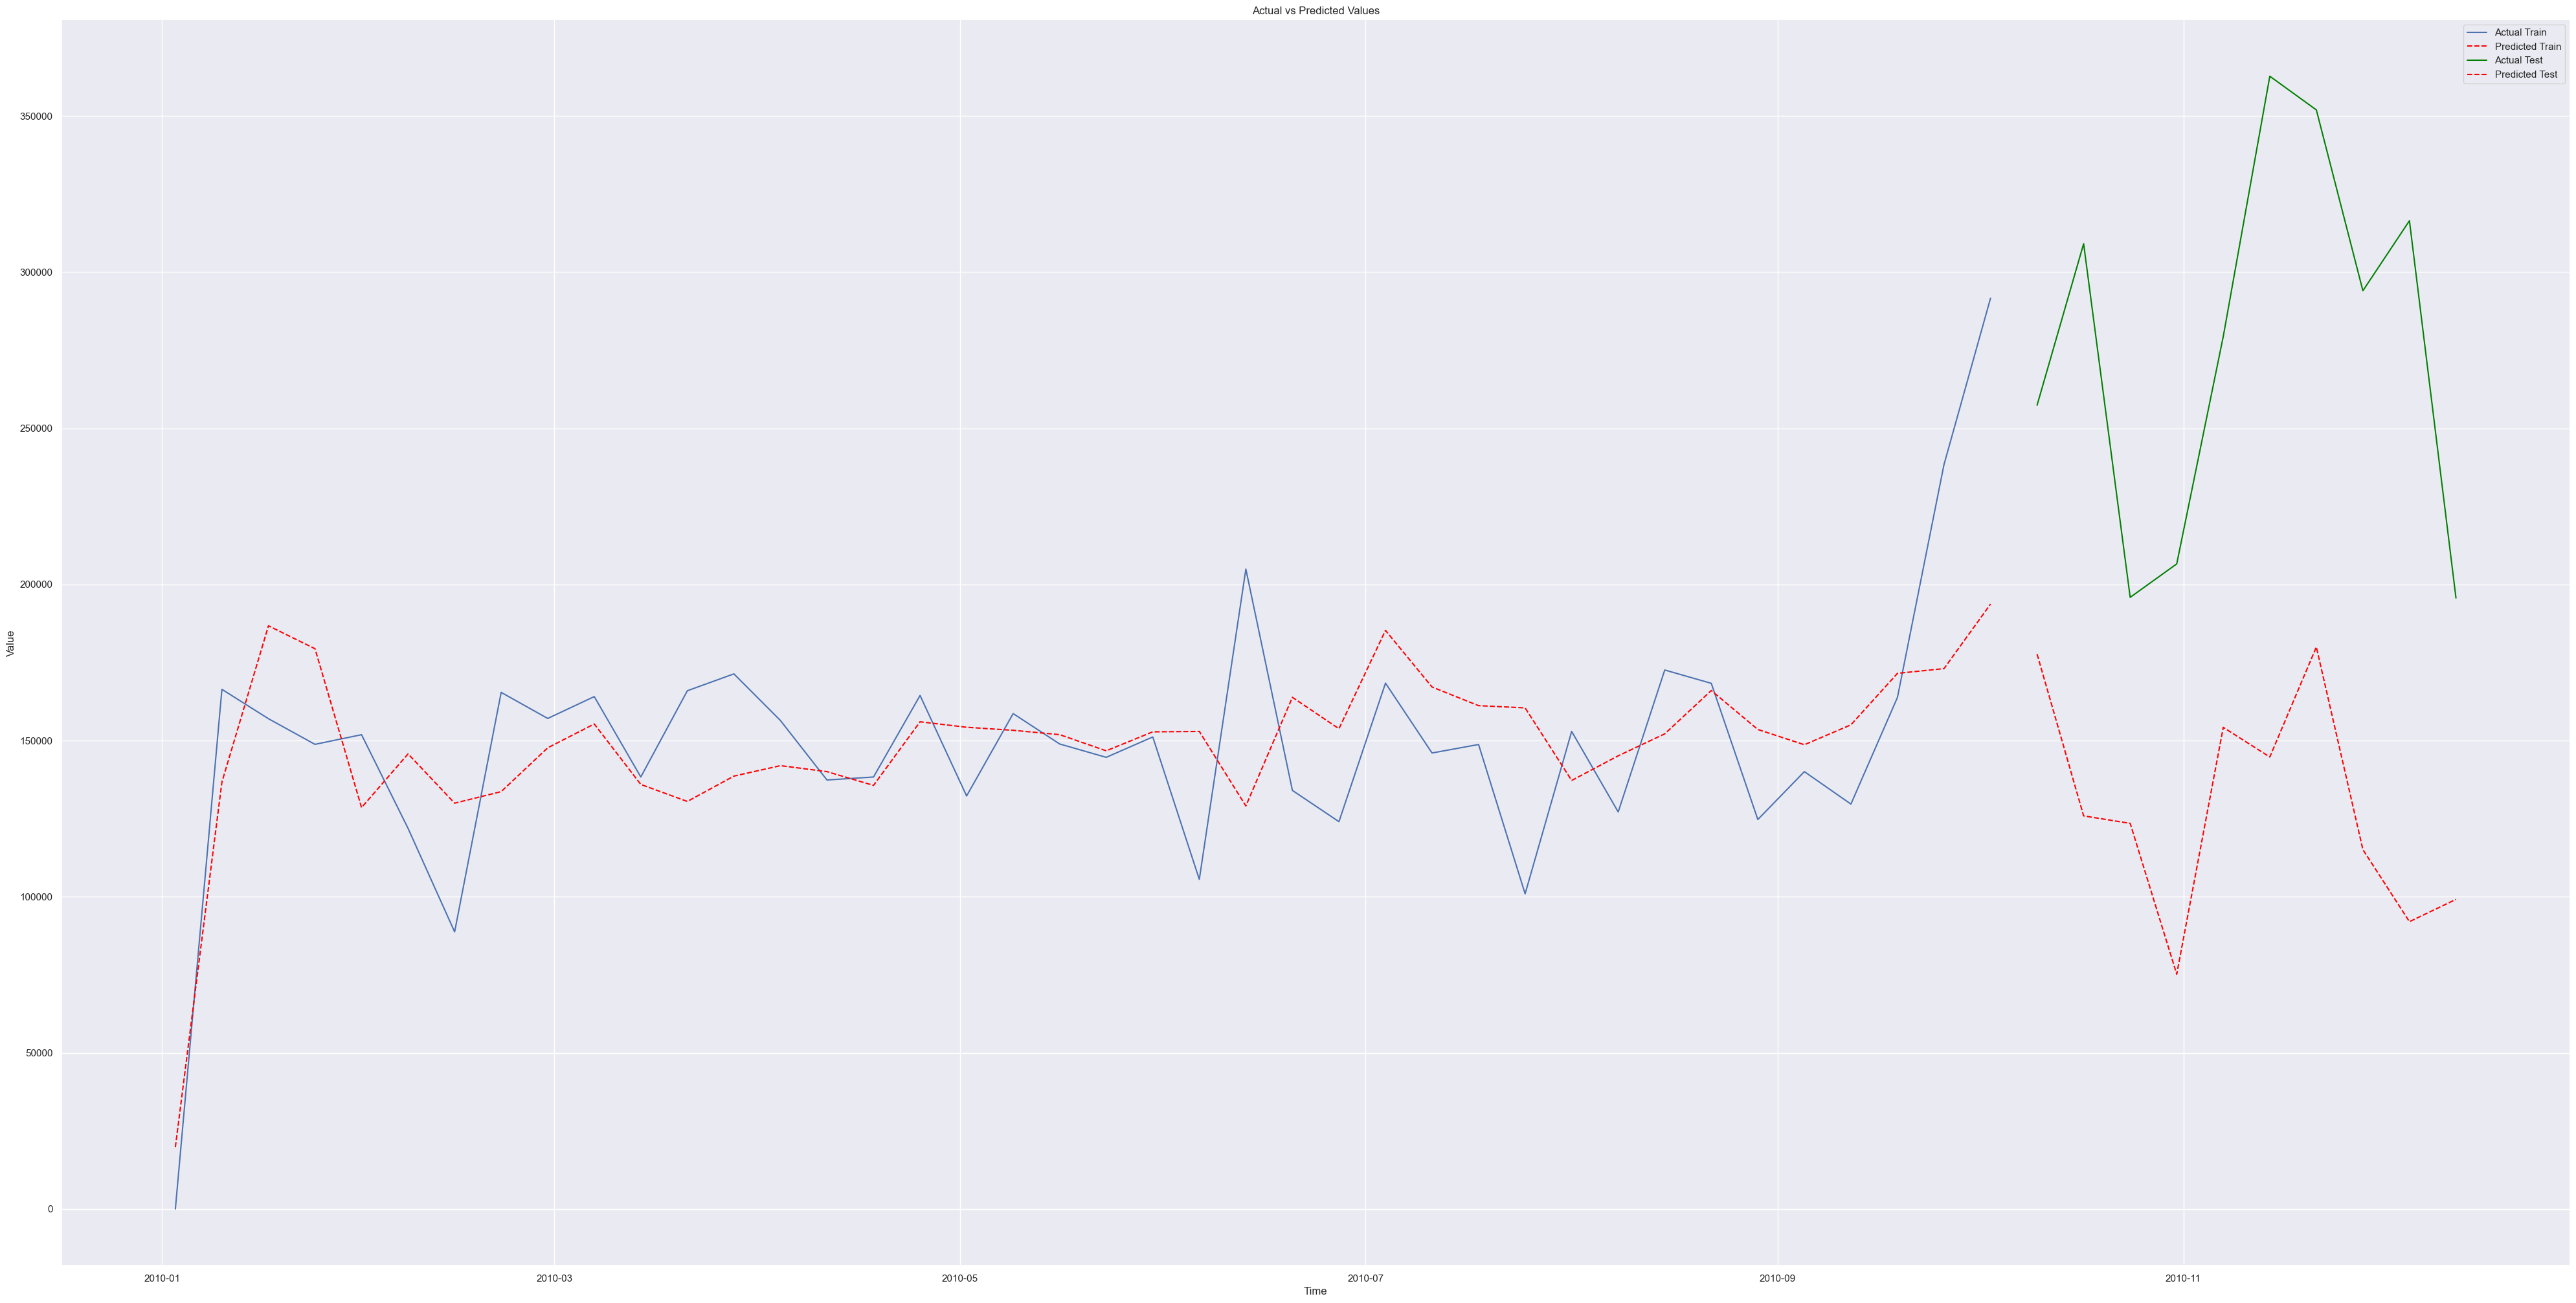

In [363]:
plt.figure(figsize=(50, 25))  # Set the figure size
plt.plot(y_train.index, y_train, label='Actual Train')  # Plot the actual values
plt.plot(y_train.index, y_pred_train, label='Predicted Train', linestyle='--', color='red')  # Plot the predicted values
plt.plot(y_test.index, y_test, label='Actual Test', color='green')  # Plot the actual values
plt.plot(y_test.index, y_pred_test, label='Predicted Test', linestyle='--', color='red')  # Plot the predicted values
plt.xlabel('Time')  # Label x-axis
plt.ylabel('Value')  # Label y-axis
plt.title('Actual vs Predicted Values')  # Title of the plot
plt.legend()  # Add a legend
plt.show()  # Display the plot

In [370]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

model = tf.keras.Sequential([
    layers.Dense(32, input_shape = (19,)) , 
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)), 
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)), 
#    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),

    layers.Dense(1, activation='linear') 
])


model.compile(loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

model.fit(X_train, y_train, epochs=2000)

Epoch 1/2000
2/2 [==============================] - 0s 11ms/step - loss: 17659826176.0000
Epoch 2/2000
2/2 [==============================] - 0s 2ms/step - loss: 5200000000.0000
Epoch 3/2000
2/2 [==============================] - 0s 488us/step - loss: 1984397696.0000
Epoch 4/2000
2/2 [==============================] - 0s 2ms/step - loss: 5886245888.0000
Epoch 5/2000
2/2 [==============================] - 0s 0s/step - loss: 4896632320.0000
Epoch 6/2000
2/2 [==============================] - 0s 551us/step - loss: 4073842176.0000
Epoch 7/2000
2/2 [==============================] - 0s 3ms/step - loss: 2666782208.0000
Epoch 8/2000
2/2 [==============================] - 0s 5ms/step - loss: 3067846656.0000
Epoch 9/2000
2/2 [==============================] - 0s 5ms/step - loss: 1917617920.0000
Epoch 10/2000
2/2 [==============================] - 0s 1ms/step - loss: 2028216704.0000
Epoch 11/2000
2/2 [==============================] - 0s 1ms/step - loss: 1518039040.0000
Epoch 12/2000
2/2 [======

In [371]:
print("For Training Data:")

# Make predictions on the test data
y_pred_train = model.predict(X_train)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train=mean_squared_error(y_train, y_pred_train)

print("Mean Absolute Error: ", mae_train)
print("R2 Score: ", r2_train)
print("Mean Squared Error: ", mse_train)

print("For Test Data:")

# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Evaluate the model
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test=mean_squared_error(y_test, y_pred_test)

print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

For Training Data:
2/2 [==============================] - 0s 4ms/step
Mean Absolute Error:  20329.512
R2 Score:  0.5433434199403284
Mean Squared Error:  786878340.0
For Test Data:
1/1 [==============================] - 0s 17ms/step
Mean Absolute Error:  42659.164
R2 Score:  0.23352647095002677
Mean Squared Error:  2636213800.0


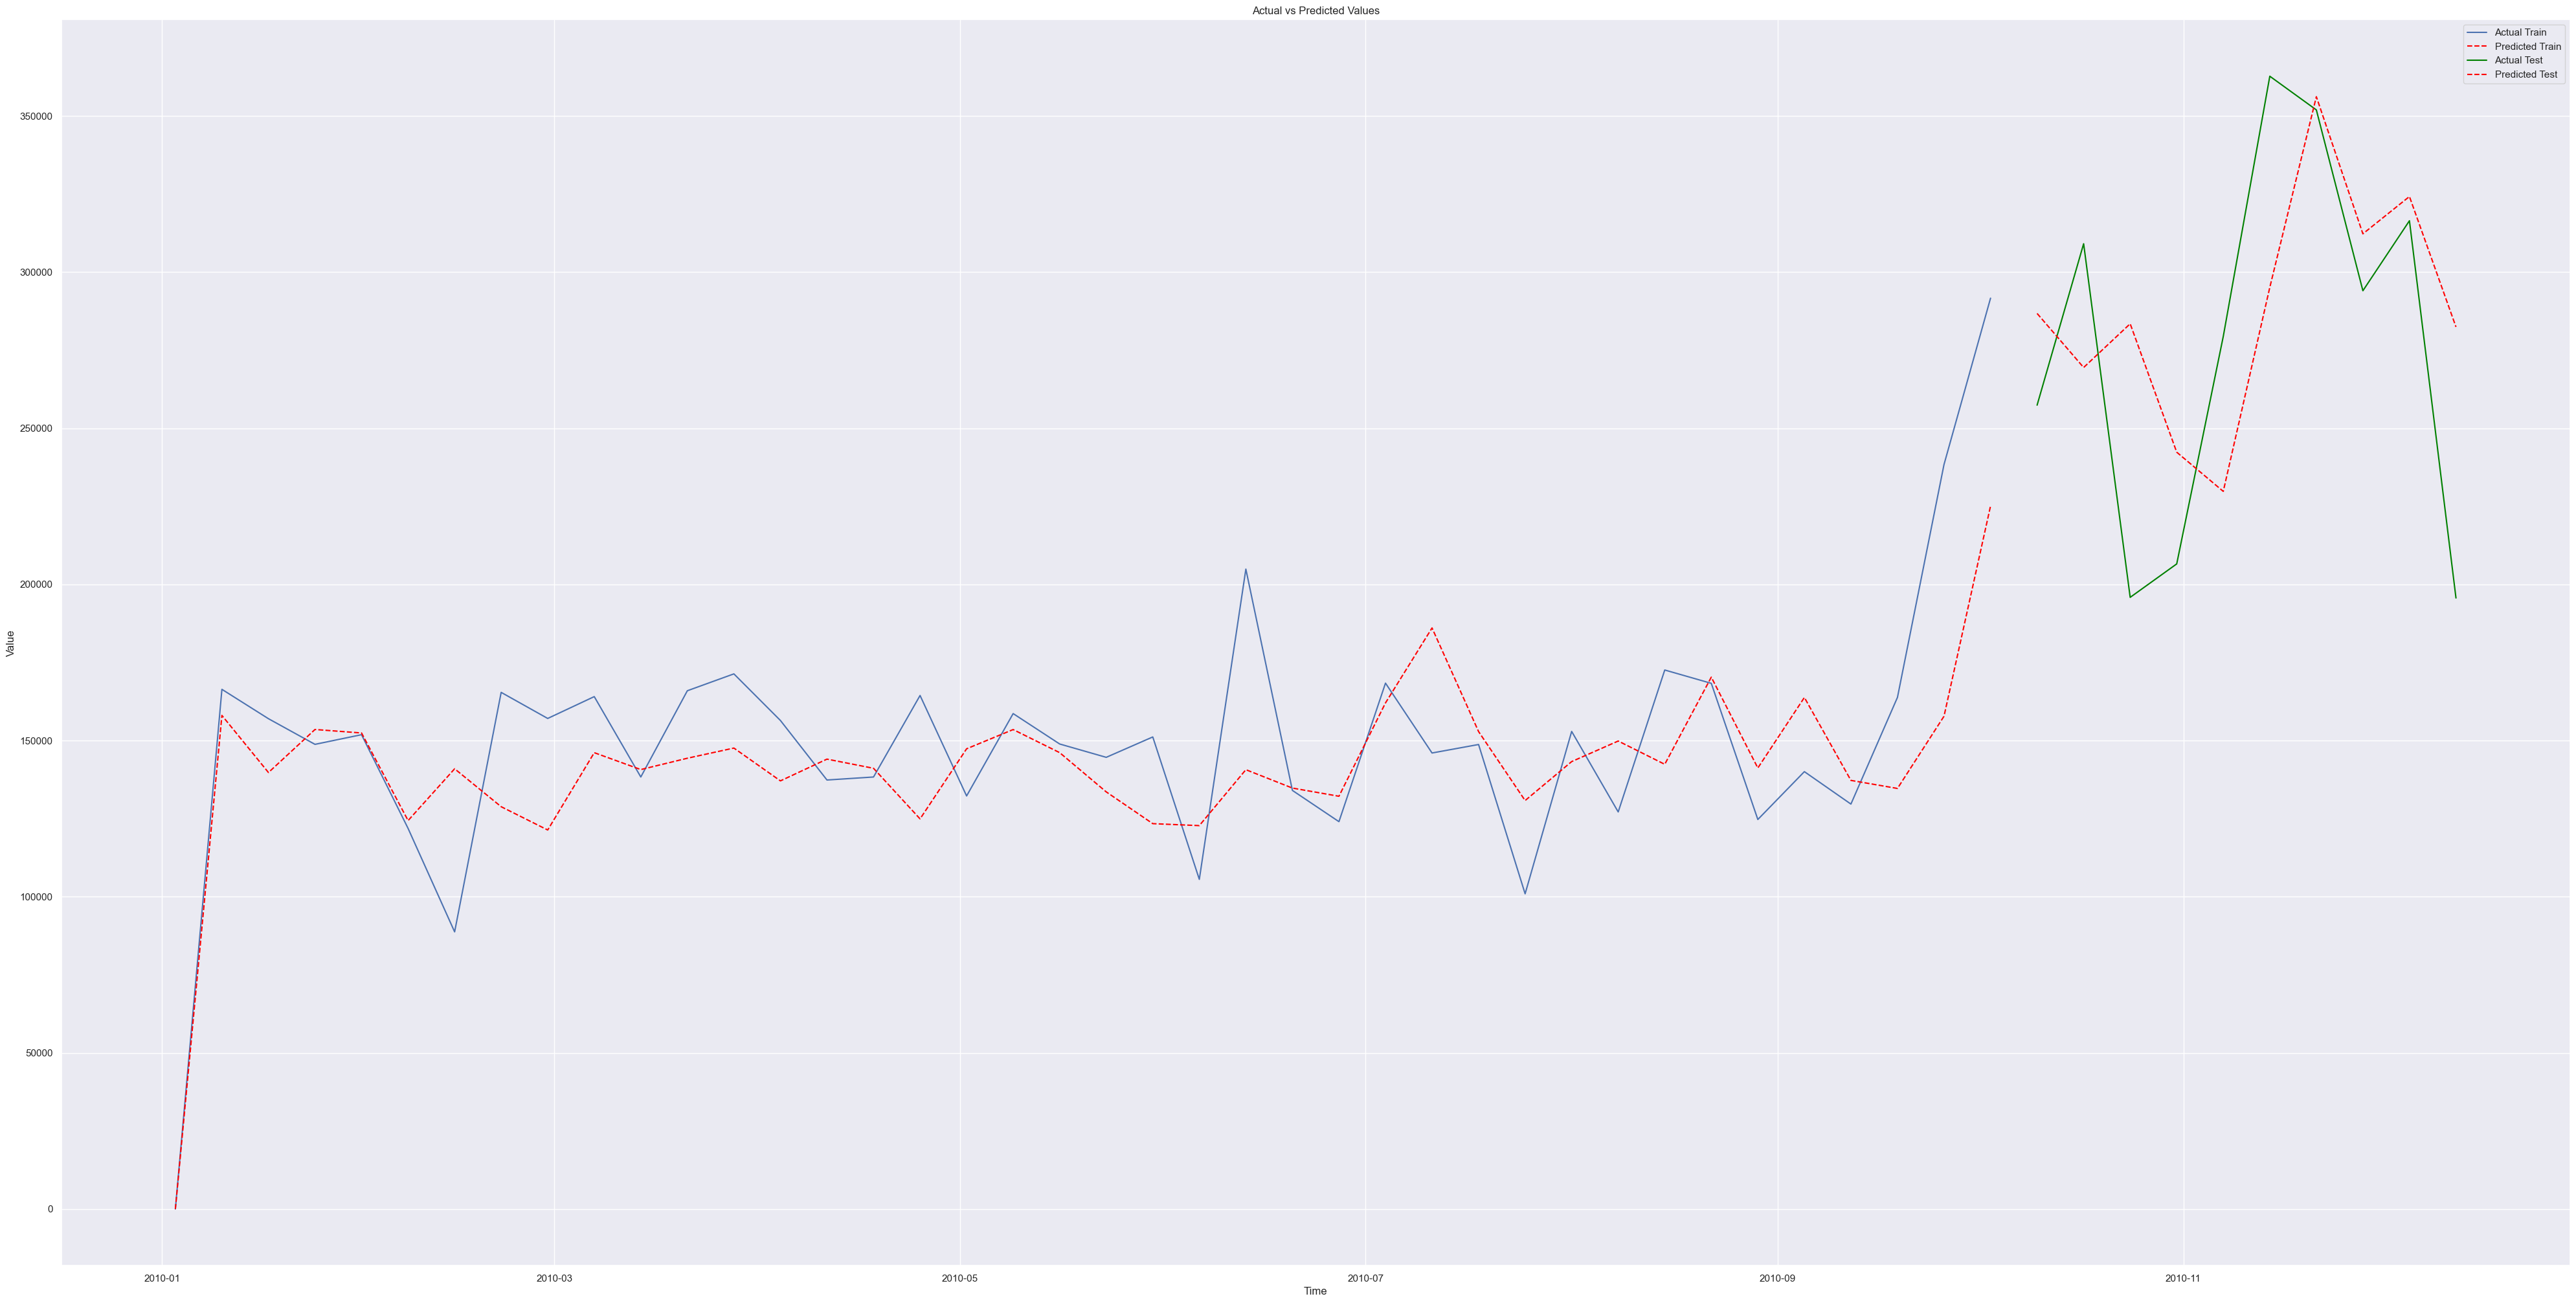

In [372]:
plt.figure(figsize=(50, 25))  # Set the figure size
plt.plot(y_train.index, y_train, label='Actual Train')  # Plot the actual values
plt.plot(y_train.index, y_pred_train, label='Predicted Train', linestyle='--', color='red')  # Plot the predicted values
plt.plot(y_test.index, y_test, label='Actual Test', color='green')  # Plot the actual values
plt.plot(y_test.index, y_pred_test, label='Predicted Test', linestyle='--', color='red')  # Plot the predicted values
plt.xlabel('Time')  # Label x-axis
plt.ylabel('Value')  # Label y-axis
plt.title('Actual vs Predicted Values')  # Title of the plot
plt.legend()  # Add a legend
plt.show()  # Display the plot